# Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Importing the dataset

In [ ]:
df = keras.datasets.cifar10.load_data()

In [ ]:
#loading the dataset...
(training_images,training_labels),(testing_images,testing_labels)=df

In [ ]:
# Rows and columns
training_images.shape
# it output (datapoints,which consist of number of pixels in rows,number of pixels in columns)

(50000, 32, 32, 3)

In [ ]:
training_labels.shape

(50000, 1)

In [ ]:
training_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

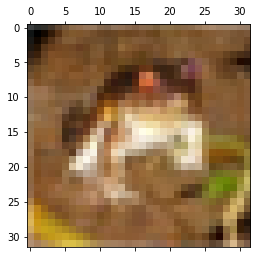

In [ ]:
plt.matshow(training_images[0])

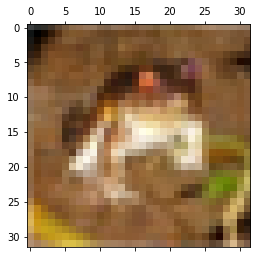

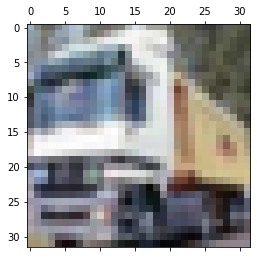

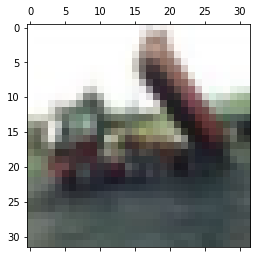

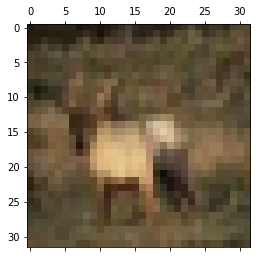

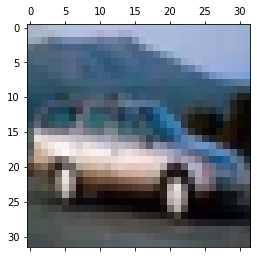

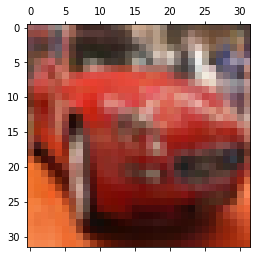

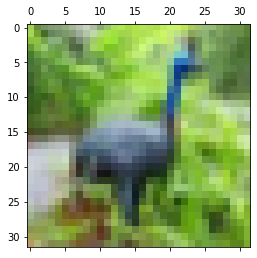

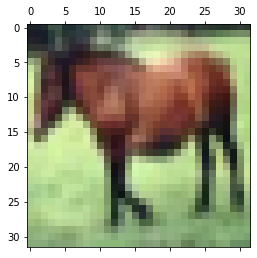

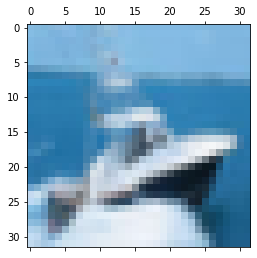

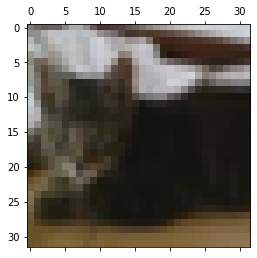

In [ ]:
for i in range(10):
  plt.matshow(training_images[i])

In [ ]:
testing_labels.shape

(10000, 1)

In [ ]:
testing_labels.ndim

2

In [ ]:
training_labels.ndim

2

In [ ]:
#reshaping training and testing images to a single 4D list..
training_images=training_images.reshape(50000,32,32,3)
testing_images=testing_images.reshape(10000,32,32,3)

In [ ]:
#dividing image pixel by 255 so that pixel comes in range 0 to 1...
training_images=training_images/255.0
testing_images=testing_images/255.0

In [ ]:
training_images[0].ndim

3

---

# CNN Model Creation
- Cuz it works best for images 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#defining the model...
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
#compiling the model...
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_images[0].shape

(32, 32, 3)

# Train/Fit the model

In [ ]:
#training data to the model...
model.fit(training_images,training_labels,epochs=8)


Epoch 1/8
1563/1563 [==============================] - 124s 79ms/step - loss: 1.4055 - accuracy: 0.4954
Epoch 2/8
1563/1563 [==============================] - 114s 73ms/step - loss: 1.0582 - accuracy: 0.6281
Epoch 3/8
1563/1563 [==============================] - 115s 74ms/step - loss: 0.9233 - accuracy: 0.6785
Epoch 4/8
1563/1563 [==============================] - 115s 74ms/step - loss: 0.8171 - accuracy: 0.7155
Epoch 5/8
1563/1563 [==============================] - 115s 74ms/step - loss: 0.7362 - accuracy: 0.7412
Epoch 6/8
1563/1563 [==============================] - 115s 74ms/step - loss: 0.6623 - accuracy: 0.7665
Epoch 7/8
1563/1563 [==============================] - 115s 74ms/step - loss: 0.5925 - accuracy: 0.7923
Epoch 8/8
1563/1563 [==============================] - 116s 74ms/step - loss: 0.5250 - accuracy: 0.8129


In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 6s 19ms/step - loss: 0.9442 - accuracy: 0.7012


In [ ]:
print("Test accuracy:",test_acc)

Test accuracy: 0.701200008392334


In [ ]:
prediction = model.predict(testing_images)

In [ ]:
prediction

array([[3.16462501e-05, 9.91228881e-05, 4.91572358e-03, ...,
        3.86616193e-05, 1.04708015e-04, 4.08439791e-06],
       [4.18268668e-04, 1.76179328e-03, 7.27244709e-10, ...,
        2.70819589e-10, 9.97743726e-01, 7.61082993e-05],
       [1.07229799e-01, 2.30995893e-01, 2.41437301e-04, ...,
        1.88686317e-04, 5.90978503e-01, 6.62224740e-02],
       ...,
       [6.12349413e-06, 2.08477559e-06, 2.72602048e-02, ...,
        1.07803112e-02, 1.97449423e-04, 2.24915602e-05],
       [1.28386472e-03, 9.69200313e-01, 1.23057223e-03, ...,
        1.58907220e-04, 5.11939504e-07, 7.96891909e-05],
       [1.09712053e-08, 1.72344616e-09, 8.67384131e-07, ...,
        9.97093439e-01, 1.19934382e-10, 4.56074378e-09]], dtype=float32)

In [ ]:
testing_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
prediction.tolist()

[[3.164625013596378e-05,
  9.912288805935532e-05,
  0.004915723577141762,
  0.8861962556838989,
  3.0432624043896794e-05,
  0.10767094045877457,
  0.0009084393968805671,
  3.866161932819523e-05,
  0.00010470801498740911,
  4.084397914994042e-06],
 [0.000418268667999655,
  0.0017617932753637433,
  7.272447088979561e-10,
  1.580114599164517e-07,
  2.5229670783111224e-11,
  1.7010337582945567e-11,
  6.408065744700764e-10,
  2.7081958897667846e-10,
  0.9977437257766724,
  7.610829925397411e-05],
 [0.1072297990322113,
  0.23099589347839355,
  0.00024143730115611106,
  0.0031985414680093527,
  0.0005285975057631731,
  0.00019967123807873577,
  0.0002164050383726135,
  0.00018868631741497666,
  0.5909785032272339,
  0.06622247397899628],
 [0.9022220373153687,
  0.0019516507163643837,
  0.00849952269345522,
  0.0005997983389534056,
  0.0016445512883365154,
  1.293797595280921e-06,
  7.575678318971768e-05,
  2.2080483176978305e-05,
  0.08445457369089127,
  0.0005285879597067833],
 [1.0941972306

In [ ]:
import pandas as pd
df1 = pd.DataFrame({"Actual":[testing_labels],"Predicted":[prediction]})

In [ ]:
df1

,Actual,Predicted
0,"[[3], [8], [8], [0], [6], [6], [1], [6], [3], ...","[[3.164625e-05, 9.912289e-05, 0.0049157236, 0...."
